In [4]:
import pandas as pd
from oceanograpy.util import time
from oceanograpy.io import cnv, _variable_defs as vardef
import importlib as imp
import xarray as xr 
import numpy as np
import  matplotlib.pyplot as plt

In [5]:
from matplotlib.dates import date2num, num2date

In [6]:
imp.reload(vardef)
imp.reload(cnv)

<module 'oceanograpy.io.cnv' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/io/cnv.py'>

In [7]:
fn = 'Sta0001.cnv'
fn = 'dfr26003.cnv'

In [8]:
header_info = cnv.read_header(fn)
ds = cnv.read_cnv(fn)

FYI: Looks like filter A was not applied to any variables.


In [948]:
ds

<xarray.Dataset>
Dimensions:       (scan_count: 40)
Coordinates:
  * scan_count    (scan_count) int64 0 1 2 3 4 5 6 7 ... 32 33 34 35 36 37 38 39
Data variables: (12/24)
    SCAN          (scan_count) float64 2.974e+03 3.026e+03 ... 4.934e+03
    PRES          (scan_count) float64 4.0 5.0 6.0 7.0 ... 40.0 41.0 42.0 43.0
    DEPTH         (scan_count) float64 3.975 4.979 5.965 ... 40.77 41.76 42.76
    TEMP1         (scan_count) float64 29.21 29.22 29.19 ... 27.73 27.65 27.49
    TEMP2         (scan_count) float64 29.21 29.22 29.2 ... 27.73 27.65 27.48
    CNDC1         (scan_count) float64 5.879 5.88 5.883 ... 5.741 5.737 5.724
    ...            ...
    sigma-é11     (scan_count) float64 22.64 22.65 22.69 ... 23.26 23.31 23.38
    SVEL          (scan_count) float64 1.545e+03 1.545e+03 ... 1.542e+03
    svCM1         (scan_count) float64 1.545e+03 1.545e+03 ... 1.542e+03
    nbin          (scan_count) float64 27.0 36.0 71.0 43.0 ... 37.0 42.0 33.0
    SBE_FLAG      (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TIME          (scan_count) float64 1.687e+04 1.687e+04 ... 1.687e+04
Attributes:
    history:              2016-03-12: Start of data collection.\n2016-03-17: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2016-03-17T18:16:45Z
    source_files:         FR26003.HEX, FR26003.XMLCON -> dfr26003.cnv
    SBE flags applied:    True
    profile_direction:    downcast

In [936]:
header_info['cnvfile']

'dfr26003.cnv'

In [938]:
ds.PRES

<xarray.DataArray 'PRES' (scan_count: 40)>
array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
       17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43.])
Coordinates:
  * scan_count  (scan_count) int64 0 1 2 3 4 5 6 7 8 ... 32 33 34 35 36 37 38 39
Attributes:
    units:                    dbar
    sensor_serial_number:     1263
    sensor_calibration_date:  15-Dec-15

In [865]:
    sensor_dict = cnv._read_sensor_info(fn, verbose = False)


In [868]:
vardef.sensor_info_dict

{'Temperature -->': 'temp_sensor_1',
 'Temperature, 2 -->': 'temp_sensor_2',
 'Conductivity -->': 'cndc_sensor_1',
 'Conductivity, 2 -->': 'cndc_sensor_2',
 'Pressure, Digiquartz with TC -->': 'pres_sensor',
 'Oxygen, SBE 43 -->': 'oxy_sensor_1',
 'Fluorometer, WET Labs ECO-AFL/FL -->': 'chla_sensor_1',
 'Transmissometer, WET Labs C-Star -->': 'attn_sensor_1',
 'Fluorometer, WET Labs ECO CDOM -->': 'cdom_sensor_1',
 'Altimeter -->': 'altimeter_sensor_1'}

In [671]:
ds.attrs['histry'] = 'a'

In [662]:
num2date(ds.TIME[0])

datetime.datetime(2016, 3, 12, 1, 32, 59, tzinfo=datetime.timezone.utc)

In [659]:
formatted_timestamp = ds.TIME[0].strftime('%Y-%m-%d %H:%M:%S')

AttributeError: 'DataArray' object has no attribute 'strftime'

In [631]:
imp.reload(cnv)

<module 'oceanograpy.io.cnv' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/io/cnv.py'>

In [572]:

def _convert_time_time_juld(ds, header_info, epoch = '1970-01-01'):
    '''
    Convert TIME_ELAPSED (sec)
    to TIME (days since 1970-01-01)
    
    Only sensible reference I could fnd is here;
    https://search.r-project.org/CRAN/refmans/oce/html/read.ctd.sbe.html

    (_DSE: time since epoch)
    '''

    start_time_DSE = ((header_info['start_time'] 
                                    - pd.Timestamp(epoch))
                                    / pd.to_timedelta(1, unit='D'))
    
    elapsed_time_days = ds.TIME_ELAPSED/86400

    TIME_ELAPSED_DSE = start_time_DSE + elapsed_time_days

    ds['TIME'] = TIME_ELAPSED_DSE
    ds.TIME.attrs['units'] = f'Days since {epoch} 00:00:00'
    ds = ds.drop('TIME_ELAPSED')

    return ds

In [577]:
header_info['start_time'].year 

Timestamp('2016-03-12 01:30:55')

In [623]:
year_start = header_info['start_time'].replace(month=1, day=1, hour=0, minute=0, second=0)
ss = pd.to_datetime(ds.timeJ-1, origin=year_start, unit='D', yearfirst=True, ).round('1s')

In [627]:
epoch = '1970-01-01'

In [628]:

    year_start = header_info['start_time'].replace(month=1, day=1, 
                        hour=0, minute=0, second=0)
    time_stamp = pd.to_datetime(ds.timeJ-1, origin=year_start, unit='D', 
                        yearfirst=True, ).round('1s')
    
    time_stamp_epoch = ((time_stamp- pd.Timestamp(epoch))
                                    / pd.to_timedelta(1, unit='D'))

In [629]:
time_stamp_epoch

Index([ 16872.06457175926, 16872.064594907406, 16872.064618055556,
        16872.06465277778, 16872.064675925925, 16872.064699074075,
        16872.06472222222, 16872.064756944445, 16872.064768518518,
       16872.064791666668, 16872.064814814814, 16872.064837962964,
        16872.06486111111,  16872.06488425926, 16872.064918981483,
       16872.064930555556,  16872.06496527778,          16872.065,
       16872.065011574075,  16872.06503472222,  16872.06505787037,
        16872.06509259259,  16872.06511574074, 16872.065127314814,
       16872.065150462964,  16872.06519675926, 16872.065208333333,
       16872.065219907407, 16872.065243055556,  16872.06527777778,
            16872.0653125, 16872.065324074076, 16872.065358796295,
       16872.065381944445,  16872.06539351852, 16872.065416666668,
       16872.065462962964, 16872.065474537038, 16872.065497685184,
        16872.06550925926],
      dtype='float64')

In [597]:
time = year_start + pd.to_timedelta(ds.timeJ-1, unit='D')

In [598]:
time

DatetimeIndex([   '2016-10-12 06:11:54.700800',
                  '2016-10-12 06:12:05.068800',
                  '2016-10-12 06:12:13.017600',
                  '2016-10-12 06:12:23.385600',
                  '2016-10-12 06:12:31.334400',
                  '2016-10-12 06:12:39.283200',
                  '2016-10-12 06:12:47.232000',
                  '2016-10-12 06:13:00.364800',
                  '2016-10-12 06:13:03.129600',
                  '2016-10-12 06:13:11.078400',
                  '2016-10-12 06:13:21.446400',
                  '2016-10-12 06:13:29.395200',
                  '2016-10-12 06:13:37.344000',
                  '2016-10-12 06:13:45.292800',
                  '2016-10-12 06:13:56.006400',
                  '2016-10-12 06:14:01.190400',
               '2016-10-12 06:14:11.558399996',
                  '2016-10-12 06:14:22.272000',
                  '2016-10-12 06:14:27.456000',
               '2016-10-12 06:14:35.404799996',
                  '2016-10-12 06:14:43.3

In [588]:
year_start = year_start + ds.timeJ

In [ ]:
start_time_juld_DSE

In [ ]:
start_time_juld_DSE = ((header_info['start_time'] 
                                    - pd.Timestamp(epoch))
                                    / pd.to_timedelta(1, unit='D'))

In [633]:
ds.TIME

AttributeError: 'Dataset' object has no attribute 'TIME'

In [576]:
header_info

{'col_nums': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'col_names': ['scan',
  'timeJ',
  'prDM',
  'depSM',
  't090C',
  't190C',
  'c0S/m',
  'c1S/m',
  'sbeox0V',
  'sbeox1V',
  'sbeox1dOV/dT',
  'sbeox0dOV/dT',
  'flECO-AFL',
  'CStarTr0',
  'sbeox0Mm/Kg',
  'sbeox1Mm/Kg',
  'sal00',
  'sal11',
  'sigma-é00',
  'sigma-é11',
  'svCM',
  'svCM1',
  'nbin',
  'flag'],
 'col_longnames': ['Scan Count',
  'Julian Days',
  'Pressure, Digiquartz [db]',
  'Depth [salt water, m]',
  'Temperature [ITS-90, deg C]',
  'Temperature, 2 [ITS-90, deg C]',
  'Conductivity [S/m]',
  'Conductivity, 2 [S/m]',
  'Oxygen raw, SBE 43 [V]',
  'Oxygen raw, SBE 43, 2 [V]',
  'Oxygen, SBE 43, 2 [dov/dt]',
  'Oxygen, SBE 43 [dov/dt]',
  'Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]',
  'Beam Transmission, WET Labs C-Star [%]',
  'Oxygen, SBE 43 [umol/kg], WS = 2',
  'Oxygen, SBE 43, 2 [umol/kg], WS = 2',
  'Salinity, Pra

In [575]:
ds.timeJ

<xarray.DataArray 'timeJ' (scan_count: 40)>
array([72.064568, 72.064598, 72.064621, 72.064651, 72.064674, 72.064697,
       72.06472 , 72.064758, 72.064766, 72.064789, 72.064819, 72.064842,
       72.064865, 72.064888, 72.064919, 72.064934, 72.064964, 72.064995,
       72.06501 , 72.065033, 72.065056, 72.065094, 72.065117, 72.065132,
       72.065147, 72.065193, 72.065208, 72.065224, 72.065247, 72.065277,
       72.065308, 72.065323, 72.065361, 72.065384, 72.065392, 72.065414,
       72.06546 , 72.065475, 72.065498, 72.065514])
Coordinates:
  * scan_count  (scan_count) int64 0 1 2 3 4 5 6 7 8 ... 32 33 34 35 36 37 38 39

In [562]:
hi = ''.join(header_info['SBEproc_hist'])

In [505]:
SBEstr = header_info['SBEproc_hist']


In [557]:
loop_ss_deckpress

'0'

In [563]:
proc_date_str

'Mar 17 2016 18:16:45'

In [564]:
    # history_str, sbe_proc_str, src_files_raw, proc_date_ISO8601
    SBElines = header_info['SBEproc_hist']

    proc_date_pattern =  r'(\w{3} \d{2} \d{4} \d{2}:\d{2}:\d{2})'
    skipover_file_pattern = r'\\([^\\]+\.XMLCON)'

    dmy_fmt = '%Y-%m-%d'

    history_str = []
    sbe_proc_str = ['SBE SOFTWARE PROCESSING STEPS (information extracted from .cnv file header)']
    for line in SBElines:
        # Get processing date
        if 'datcnv_date' in line:
            proc_date_str = re.search(proc_date_pattern, line).group(1)
            proc_date = pd.to_datetime(proc_date_str) 
            proc_date_ISO8601 = time.datetime_to_ISO8601(proc_date) 
            proc_date_dmy = proc_date.strftime(dmy_fmt)
            history_str += [f'{proc_date_dmy}: Processed using SBE software (see "SBE_processing_steps").']

        # Get input file names (without paths)
        if 'datcnv_in' in line:
            hex_fn = re.search(r'\\([^\\]+\.HEX)', line.upper()).group(1)
            xmlcon_fn = re.search(r'\\([^\\]+\.XMLCON)', line.upper()).group(1)
            src_files_raw = f'{hex_fn}, {xmlcon_fn}'
            sbe_proc_str += [f'Raw data read from {hex_fn}, {xmlcon_fn}.']

        # SBE processing details
        # Get skipover scans
        if 'datcnv_skipover' in line:
            skipover_scans = int(re.search(r'= (\d+)', line).group(1))
            if skipover_scans != 0:
                sbe_proc_str += [f'Skipped over {skipover_scans} initial scans.']

        # Get ox hysteresis correction 
        if 'datcnv_ox_hysteresis_correction' in line:
            ox_hyst_yn = re.search(r'= (\w+)', line).group(1)
            if ox_hyst_yn == 'yes':
                sbe_proc_str += [f'Oxygen hysteresis correction applied.']

        # Get ox tau correction 
        if 'datcnv_ox_tau_correction' in line:
            ox_hyst_yn = re.search(r'= (\w+)', line).group(1)
            if ox_hyst_yn == 'yes':
                sbe_proc_str += [f'Oxygen tau correction applied.']

        # Get low pass filter details
        if 'filter_low_pass_tc_A' in line:
            lp_A = float(re.search(r' = (\d+\.\d+)', line).group(1))
        if 'filter_low_pass_tc_B' in line:
            lp_B = float(re.search(r' = (\d+\.\d+)', line).group(1))
        if 'filter_low_pass_A_vars' in line:
            try:
                lp_vars_A = re.search(r' = (.+)$', line).group(1).split()
                sbe_proc_str += [f'Low-pass filter with time constant {lp_A}'
                    + f' seconds applied to: {" ".join(lp_vars_A)}.']
            except: 
                print('FYI: Looks like filter A was not applied to any variables.')
        if 'filter_low_pass_B_vars' in line:
            try:
                lp_vars_B = re.search(r' = (.+)$', line).group(1).split()
                sbe_proc_str += [f'Low-pass filter with time constant {lp_B}'
                    + f' seconds applied to: {" ".join(lp_vars_B)}.']
            except:
                print('FYI: Looks like filter A was not applied to any variables.')

        # Get cell thermal mass correction details 
        if 'celltm_alpha' in line:
            celltm_alpha = re.search(r'= (.+)$', line).group(1)
        if 'celltm_tau' in line:
            celltm_tau= re.search(r'= (.+)$', line).group(1)
        if 'celltm_temp_sensor_use_for_cond' in line:
            celltm_sensors = re.search(r'= (.+)$', line).group(1)
            sbe_proc_str += ['Cell thermal mass correction applied to conductivity' 
                 f' from sensors: [{celltm_sensors}]. ',
                 f'-> Parameters ALPHA: [{celltm_alpha}], TAU: [{celltm_tau}].']

        # Get loop edit details
        if 'loopedit_minVelocity' in line:
            loop_minvel = re.search(r'= (\d+(\.\d+)?)', line).group(1)                
        if 'loopedit_surfaceSoak' in line and float(loop_minvel)>0:
            loop_ss_mindep = re.search(r'minDepth = (\d+(\.\d+)?)', line).group(1)
            loop_ss_maxdep = re.search(r'maxDepth = (\d+(\.\d+)?)', line).group(1)
            loop_ss_deckpress = re.search(r'useDeckPress = (\d+(\.\d+)?)', line).group(1)
        if 'loopedit_excl_bad_scans' in line and float(loop_minvel)>0:
            loop_excl_bad_scans = re.search(r'= (.+)', line).group(1)
            if loop_excl_bad_scans == 'yes':
                loop_excl_str = 'Bad scans excluded'
            else:
                loop_excl_str = 'Bad scans not excluded'
            sbe_proc_str += ['Loop editing applied.',
                 (f'-> Parameters: Minimum velocity (ms-1): {loop_minvel}, '
                  f'Soak depth range (m): {loop_ss_mindep} to {loop_ss_maxdep}, '
                  + f'{loop_excl_str}.')]

        # Get wild edit details
        if 'wildedit_date' in line:
            sbe_proc_str += ['Wild editing applied.']
        if 'wildedit_vars' in line:
            we_vars = re.search(r' = (.+)$', line).group(1).split()
            sbe_proc_str += [f'Wild edit algorithm applied to: {" ".join(we_vars)}.']
        if 'wildedit_pass1_nstd' in line:
            we_pass1 = float(re.search(r' = (\d+\.\d+)', line).group(1))
        if 'wildedit_pass2_nstd' in line:
            we_pass2 = float(re.search(r' = (\d+\.\d+)', line).group(1))
        if 'wildedit_pass2_mindelta' in line:
            we_mindelta = float(re.search(r' = (\d+\.\d+)', line).group(1))
        if 'wildedit_npoint' in line:
            we_npoint = float(re.search(r' = (\d+)', line).group(1))
            sbe_proc_str += [(f'-> Parameters: n_std, first pass: {we_pass1}, '
                f'n_std, second pass: {we_pass2}, min_delta: {we_mindelta}, '
                f'# points per test: {we_npoint}.')]

        # Get align CTD details
        if 'alignctd_adv' in line:
            # Find all matches in the string
            matches = re.findall(r'(\w+)\s+([0-9.]+)', line)
            # Rerutn a list of tuples with (variable, advance time in seconds)
            align_tuples = [(key, float(value)) for key, value in matches]
            sbe_proc_str += ['Misalignment correction applied.']
            sbe_proc_str += [f'-> Parameters [variable (advance time, sec)]:']
            align_str = []
            for align_tuple in align_tuples:
                align_str += [f'{align_tuple[0]} ({align_tuple[1]})'] 
            sbe_proc_str += [f'-> {", ".join(align_str)}']


FYI: Looks like filter A was not applied to any variables.


In [261]:
imp.reload(time)

<module 'oceanograpy.util.time' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/util/time.py'>

In [148]:
    start_time_days_since_epoch = ((header_info['start_time'] 
                                    - pd.Timestamp('1970-01-01'))
                                / pd.to_timedelta(1, unit='D'))

In [149]:
start_time_days_since_epoch

10957.280231481482

In [150]:
ds_uf = cnv.read_cnv(fn, apply_flags=False)
ds = cnv.read_cnv(fn, apply_flags=True)

In [151]:
ds.TIME_ELAPSED

<xarray.DataArray 'TIME_ELAPSED' (scan_count: 3686)>
array([10957.28335986, 10957.28336034, 10957.28336082, ...,
       10957.28566744, 10957.28566792, 10957.28566985])
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Attributes:
    units:    Days since 1970-01-01 00:00:00

In [152]:
ds_binned = cnv.bin_to_pressure(ds, dp = 2)

In [ ]:
0.5*150/

In [155]:
24*60*(ds_binned.TIME_ELAPSED[-1]- ds_binned.TIME_ELAPSED[0])

<xarray.DataArray 'TIME_ELAPSED' ()>
array(3.1151254)
Attributes:
    units:    Days since 1970-01-01 00:00:00

In [74]:
line = '# start_time = Jan 01 2000 06:43:32 [NMEA time, header]'

In [ ]:
pd.p

In [80]:
start_time_str

'Jan 01 2000 06:43:32'

In [81]:
start_time_str = ' '.join(line.split()[3:7])
start_time_pdtime = pd.to_datetime(start_time_str,
               format='%b %d %Y %H:%M:%S')


Timestamp('2000-01-01 06:43:32')

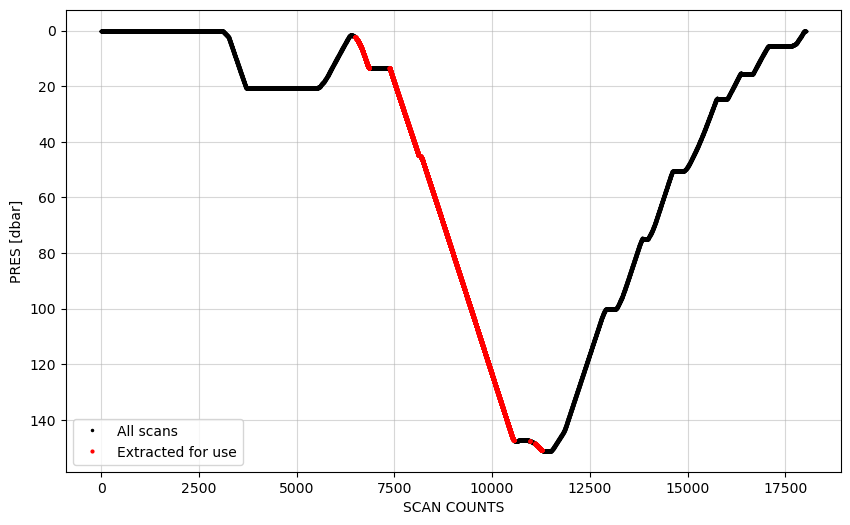

In [27]:
ds = cnv.read_cnv(fn, apply_flags=True, inspect_plot=True, start_scan = None)

## Binning 

In [6]:
dp = 2

In [7]:
# Specifying in order to conserve attributes (units etc) through the
# following operations
xr.set_options(keep_attrs=True)

In [17]:
len(Pi)

73

In [40]:
ds_binned.set_coords?

Signature: ds_binned.set_coords(names: 'Hashable | Iterable[Hashable]') -> 'T_Dataset'
Docstring:
Given names of one or more variables, set them as coordinates

Parameters
----------
names : hashable or iterable of hashable
    Name(s) of variables in this dataset to convert into coordinates.

Examples
--------
>>> dataset = xr.Dataset(
...     {
...         "pressure": ("time", [1.013, 1.2, 3.5]),
...         "time": pd.date_range("2023-01-01", periods=3),
...     }
... )
>>> dataset
<xarray.Dataset>
Dimensions:   (time: 3)
Coordinates:
  * time      (time) datetime64[ns] 2023-01-01 2023-01-02 2023-01-03
Data variables:
    pressure  (time) float64 1.013 1.2 3.5

>>> dataset.set_coords("pressure")
<xarray.Dataset>
Dimensions:   (time: 3)
Coordinates:
    pressure  (time) float64 1.013 1.2 3.5
  * time      (time) datetime64[ns] 2023-01-01 2023-01-02 2023-01-03
Data variables:
    *empty*

On calling ``set_coords`` , these data variables are converted to coordinates, as shown in the fi

In [50]:
ds_binned.swap_dims({'PRES_bins':'PRES'}).drop_vars('PRES_bins')


<xarray.Dataset>
Dimensions:       (PRES: 73)
Coordinates:
  * PRES          (PRES) float64 5.0 7.0 9.0 11.0 ... 143.0 145.0 147.0 149.0
Data variables: (12/14)
    TEMP1         (PRES) float64 -1.293 -1.293 -1.295 ... -0.4952 -0.4871
    TEMP2         (PRES) float64 -1.294 -1.29 -1.292 ... -0.5106 -0.4965 -0.4874
    CNDC1         (PRES) float64 2.437 2.437 2.437 2.437 ... 2.801 2.804 2.805
    CNDC2         (PRES) float64 2.437 2.437 2.437 2.437 ... 2.801 2.804 2.805
    DOXY1         (PRES) float64 383.4 383.5 383.7 383.3 ... 280.2 280.0 279.9
    CDOM1         (PRES) float64 0.112 0.1099 0.11 ... 0.1145 0.1139 0.1134
    ...            ...
    TIME_ELAPSED  (PRES) float64 275.7 278.3 280.4 282.5 ... 437.0 440.7 462.6
    LATITUDE      (PRES) float64 81.27 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE     (PRES) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786 -9.786
    PSAL1         (PRES) float64 30.12 30.12 30.12 30.12 ... 34.12 34.14 34.15
    PSAL2         (PRES) float64 30.12 30.12 30.12 30.13 ... 34.12 34.14 34.14
    SBE_FLAG      (PRES) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True

In [44]:
dsb_a = ds_binned.rename_dims({'PRES_bins':'PRES'})


ValueError: Cannot rename PRES_bins to PRES because PRES already exists. Try using swap_dims instead.

In [ ]:
dd = xr.Datds_binned

In [43]:
dsb_a

<xarray.Dataset>
Dimensions:       (PRES_bins: 73)
Coordinates:
  * PRES_bins     (PRES_bins) object (4.0, 6.0] (6.0, 8.0] ... (148.0, 150.0]
    PRES          (PRES_bins) float64 5.0 7.0 9.0 11.0 ... 145.0 147.0 149.0
Data variables: (12/14)
    TEMP1         (PRES_bins) float64 -1.293 -1.293 -1.295 ... -0.4952 -0.4871
    TEMP2         (PRES_bins) float64 -1.294 -1.29 -1.292 ... -0.4965 -0.4874
    CNDC1         (PRES_bins) float64 2.437 2.437 2.437 ... 2.801 2.804 2.805
    CNDC2         (PRES_bins) float64 2.437 2.437 2.437 ... 2.801 2.804 2.805
    DOXY1         (PRES_bins) float64 383.4 383.5 383.7 ... 280.2 280.0 279.9
    CDOM1         (PRES_bins) float64 0.112 0.1099 0.11 ... 0.1145 0.1139 0.1134
    ...            ...
    TIME_ELAPSED  (PRES_bins) float64 275.7 278.3 280.4 ... 437.0 440.7 462.6
    LATITUDE      (PRES_bins) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE     (PRES_bins) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1         (PRES_bins) float64 30.12 30.12 30.12 ... 34.12 34.14 34.15
    PSAL2         (PRES_bins) float64 30.12 30.12 30.12 ... 34.12 34.14 34.14
    SBE_FLAG      (PRES_bins) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True

In [166]:
dsb_a = ds_binned.set_index({'PRES'})

NameError: name 'ds_binned' is not defined

In [11]:
ds_binned.TEMP1

<xarray.DataArray 'TEMP1' (PRES_bins: 73)>
array([-1.29263906, -1.29309782, -1.29505334, -1.29290968, -1.30545718,
       -1.31931155, -1.37778109, -1.38998245, -1.39089029, -1.39672992,
       -1.41337731, -1.44734154, -1.48535316, -1.5164805 , -1.56743868,
       -1.58805235, -1.60523172, -1.61135107, -1.59528504, -1.59095009,
       -1.58651549, -1.59070403, -1.59128202, -1.58415777, -1.56684782,
       -1.52138875, -1.50957043, -1.50131549, -1.49244754, -1.47784611,
       -1.47371882, -1.44865276, -1.42773044, -1.40891281, -1.39391944,
       -1.40123112, -1.4043882 , -1.38080045, -1.38885875, -1.39232329,
       -1.35412248, -1.22769681, -1.09717834, -1.04315279, -0.99640914,
       -0.92984042, -0.93489311, -0.87097649, -0.81161278, -0.76563828,
       -0.75562679, -0.74901421, -0.74017036, -0.73775976, -0.73746921,
       -0.73237742, -0.72477196, -0.71981918, -0.70674344, -0.69609319,
       -0.67481594, -0.64461216, -0.62011687, -0.60707644, -0.56877205,
       -0.55632261, -0.55032734, -0.53346721, -0.52728951, -0.5180046 ,
       -0.51005258, -0.49521349, -0.48710404])
Coordinates:
  * PRES_bins  (PRES_bins) object (4.0, 6.0] (6.0, 8.0] ... (148.0, 150.0]
Attributes:
    units:    degree_Celsius

<xarray.DataArray 'TEMP1' (scan_count: 3686)>
array([-1.2912, -1.291 , -1.2912, ..., -0.4869, -0.4871, -0.4867])
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Attributes:
    units:                     degree_Celsius
    instrument_serial_number:  5884\n

In [56]:
%matplotlib tk

In [57]:
fig, ax = plt.subplots()
ax.plot(ds.PSAL1, ds.PRES, )
ax.plot(ds_pavg.PSAL1, ds_pavg.PRES, )
ax.plot(ds_binned.PSAL1, Pi, )

ax.invert_yaxis()

In [238]:
pmax_bound

150.0

In [ ]:
time.datetime_to_ISO8601(

### Parse instrument details

SN and Cal date

In [6]:
cnvfile = 'Sta0001.cnv'

In [51]:
ds

<xarray.Dataset>
Dimensions:       (scan_count: 3686)
Coordinates:
  * scan_count    (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Data variables: (12/15)
    PRES          (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1         (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2         (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    CNDC1         (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    CNDC2         (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    DOXY1         (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    ...            ...
    TIME_ELAPSED  (scan_count) float64 1.096e+04 1.096e+04 ... 1.096e+04
    LATITUDE      (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE     (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1         (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2         (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    SBE_FLAG      (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True

In [168]:
sensor_info_dict = {
    'Temperature -->':'temp_sensor_1',
    'Temperature, 2 -->':'temp_sensor_2',
    'Conductivity -->':'cndc_sensor_1',
    'Conductivity, 2 -->':'cndc_sensor_2',
    'Pressure, Digiquartz with TC -->':'pres_sensor',
    'Oxygen, SBE 43 -->':'oxy_sensor_1',
    'Fluorometer, WET Labs ECO-AFL/FL -->':'chla_sensor_1',
    'Transmissometer, WET Labs C-Star -->':'attn_sensor_1',
    'Fluorometer, WET Labs ECO CDOM -->':'cdom_sensor_1',
    'Altimeter -->':'altimeter_sensor_1',
}


In [214]:
imp.reload(vardef)
imp.reload(cnv)

<module 'oceanograpy.io.cnv' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/io/cnv.py'>

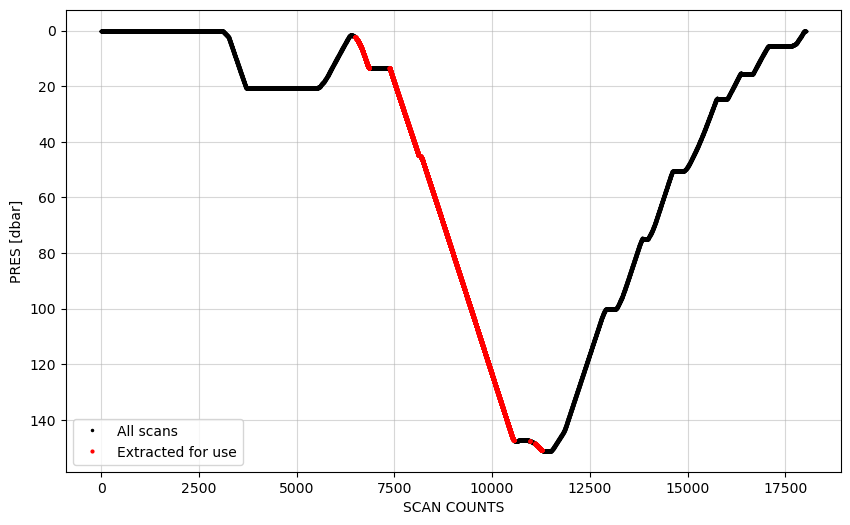

In [215]:
ds = cnv.read_cnv(fn, apply_flags=True, inspect_plot=True, )

In [216]:
cnv.read_cnv?

Signature:
cnv.read_cnv(
    cnvfile: str,
    apply_flags: Optional[bool] = True,
    profile: Optional[str] = 'downcast',
    inspect_plot: Optional[bool] = False,
    start_scan: Optional[int] = None,
    end_scan: Optional[int] = None,
) -> xarray.core.dataset.Dataset
Docstring:
Reads CTD data and metadata from a .cnv file into a more handy format.

Parameters
----------
cnvfile: str
    Path to a .cnv file containing the data 

apply_flags: bool, optional 
    If True, flags (from the SBE *flag* column) are applied as NaNs across
    all variables (recommended). Default is True.
 
 profile: str, optional
    Specify the profile type. Options are ['upcast', 'downcast', 'none'].

    inspect_plot : bool, optional
        Return a plot of the whole pressure time series, showing the part of the profile 
        we extracted (useful for inspecting up/downcast extraction and SBE flags).
        Default is False.

    start_scan : int, optional
        Manually specify the scan at which 

In [226]:
ds.TIME_ELAPSED

<xarray.DataArray 'TIME_ELAPSED' (scan_count: 3686)>
array([10957.28335986, 10957.28336034, 10957.28336082, ...,
       10957.28566744, 10957.28566792, 10957.28566985])
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Attributes:
    units:    Days since 1970-01-01 00:00:00

In [233]:
hd

NameError: name 'hd' is not defined

In [231]:
ds

<xarray.Dataset>
Dimensions:       (scan_count: 3686)
Coordinates:
  * scan_count    (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Data variables: (12/15)
    PRES          (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1         (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2         (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    CNDC1         (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    CNDC2         (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    DOXY1         (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    ...            ...
    TIME_ELAPSED  (scan_count) float64 1.096e+04 1.096e+04 ... 1.096e+04
    LATITUDE      (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE     (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1         (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2         (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    SBE_FLAG      (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True
    profile_direction:  downcast

In [230]:
ds.drop('TIME_ELAPSED')

<xarray.Dataset>
Dimensions:     (scan_count: 3686)
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Data variables: (12/14)
    PRES        (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1       (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2       (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    CNDC1       (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    CNDC2       (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    DOXY1       (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    ...          ...
    ATTN1       (scan_count) float64 0.2889 0.2889 0.2889 ... 0.2433 0.2436
    LATITUDE    (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE   (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1       (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2       (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    SBE_FLAG    (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True
    profile_direction:  downcast

In [153]:
a = ['aa', 'bb']
', '.join(a)

'aa, bb'

In [134]:
import re

In [126]:
0*print('a')

a


TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [130]:
sensor_dict = {}
verbose = True 

with open(cnvfile, 'r') as f:
    look_sensor = False

    for n_line, line in enumerate(f.readlines()):
        if '<sensor' in line:
            look_sensor = True
            sensor_header_line = n_line+1
            store_sensor_info = False

       # print(look_sensor)
        if look_sensor:
            #
            if n_line == sensor_header_line:
                for sensor_str, var_key in sensor_info_dict.items():
                #    print(sensor_str)
                    if sensor_str in line:
                        store_sensor_info = True
                        var_key_sensor = var_key
                shline = line.replace('#     <!-- ', '').replace('\n', '')
                (print(f'\nRead from: {var_key_sensor} ({shline})') 
                 if verbose else None)

            
            if store_sensor_info:
                # Grab instrument serial number
                if '<SerialNumber>' in line:
                    rind_sn = line.rindex('<SerialNumber>')+14
                    SN_instr = (line[rind_sn:]
                                .replace('</SerialNumber>', '')
                                .replace('\n', '')
                                .replace(' NPI', ''))
                # Grab calibration date
                if '<CalibrationDate>' in line:
                    rind_cd = line.rindex('<CalibrationDate>')+17
                    cal_date_instr = (line[rind_cd:]
                                .replace('</CalibrationDate>', '')
                                .replace('\n', ''))
        
        if '</sensor>' in line:
            (print(f'SN: {SN_instr}  // cal date: {cal_date_instr}')
             if verbose else None)
            if look_sensor and store_sensor_info:
                sensor_dict[var_key_sensor] = {
                    'SN':SN_instr,
                    'cal_date':cal_date_instr
                }

            (print(f'Stop reading from {var_key_sensor} (save: {store_sensor_info})') 
             if verbose else None)
            look_sensor, var_key_sensor, = False, None
            SN_instr, cal_date_instr = None, None


Read from: temp_sensor_1 (Frequency 0, Temperature -->)
SN: 5884  // cal date: 14-Oct-22
Stop reading from temp_sensor_1 (save: True)

Read from: cndc_sensor_1 (Frequency 1, Conductivity -->)
SN: 2860  // cal date: 18-Oct-22
Stop reading from cndc_sensor_1 (save: True)

Read from: pres_sensor (Frequency 2, Pressure, Digiquartz with TC -->)
SN: 141612  // cal date: 19-Dec-17
Stop reading from pres_sensor (save: True)

Read from: temp_sensor_2 (Frequency 3, Temperature, 2 -->)
SN: 6504  // cal date: 12-Oct-22
Stop reading from temp_sensor_2 (save: True)

Read from: cndc_sensor_2 (Frequency 4, Conductivity, 2 -->)
SN: 3123  // cal date: 18-Oct-22
Stop reading from cndc_sensor_2 (save: True)

Read from: oxy_sensor_1 (A/D voltage 0, Oxygen, SBE 43 -->)
SN: 3785  // cal date: 29-Nov-22
Stop reading from oxy_sensor_1 (save: True)

Read from: altimeter_sensor_1 (A/D voltage 1, Altimeter -->)
SN: 73084  // cal date: 24/12-2017
Stop reading from altimeter_sensor_1 (save: True)

Read from: chla_

In [120]:
sensor_dict

{'temp_sensor_1': {'SN': '5884', 'cal_date': '14-Oct-22'},
 'cndc_sensor_1': {'SN': '2860', 'cal_date': '18-Oct-22'},
 'pres_sensor': {'SN': '141612', 'cal_date': '19-Dec-17'},
 'temp_sensor_2': {'SN': '6504', 'cal_date': '12-Oct-22'},
 'cndc_sensor_2': {'SN': '3123', 'cal_date': '18-Oct-22'},
 'oxy_sensor_1': {'SN': '3785', 'cal_date': '29-Nov-22'},
 'altimeter_sensor_1': {'SN': '73084', 'cal_date': '24/12-2017'},
 'chla_sensor_1': {'SN': 'FLRTD-6506', 'cal_date': '18-Sep-2020'},
 'attn_sensor_1': {'SN': 'CST-2003DR', 'cal_date': '2019-10-01'},
 'cdom_sensor_1': {'SN': 'FLCDRTD-4531', 'cal_date': '12/05/2023'}}

In [32]:
sensor_header_line

285

In [63]:
ds.CDOM1

<xarray.DataArray 'CDOM1' (scan_count: 3686)>
array([0.1099, 0.1099, 0.1099, ..., 0.1139, 0.1138, 0.1137])
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Attributes:
    units:                     mg m-3
    instrument_serial_number:  FLCDRTD-4531 NPI\n